Importação das bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

Leitura do csv e primeira impresão das 5 primeiras linhas

In [ ]:
df = pd.read_csv('/content/churn.csv', sep=',')
df.head(5)

Olhar os tipos de coluna e identificar se há valores nulos.

In [ ]:
df.info()

Filtrando o dataset para quem saiu

In [5]:
saida_pessoal = df.loc[df.Exited == 1]

Primeiras impressões de quem saiu

In [ ]:
saida_pessoal.describe()

#1.Iniciando a análise exploratória 

Gráfico de pizza do percentual de clientes

In [ ]:
values = df.Geography.value_counts()
labels = ['Germany','France','Spain']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90)

plt.setp(texts, color = 'black')
plt.setp(autotexts, size = 8, color = 'black')
autotexts[1].set_color('black')
plt.show()

Gráfico de pizza de gênero

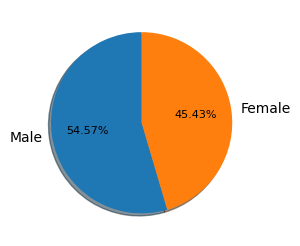

In [11]:
values = df.Gender.value_counts()
labels = ['Male','Female']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90)

plt.setp(texts, color = 'black')
plt.setp(autotexts, size = 8, color = 'black')
autotexts[1].set_color('black')
plt.show()

Gráfico de pizza quem saiu e não saiu

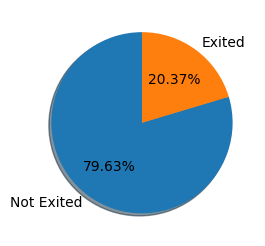

In [10]:
values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)


patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90)

plt.show()

Visualização geral das categorias

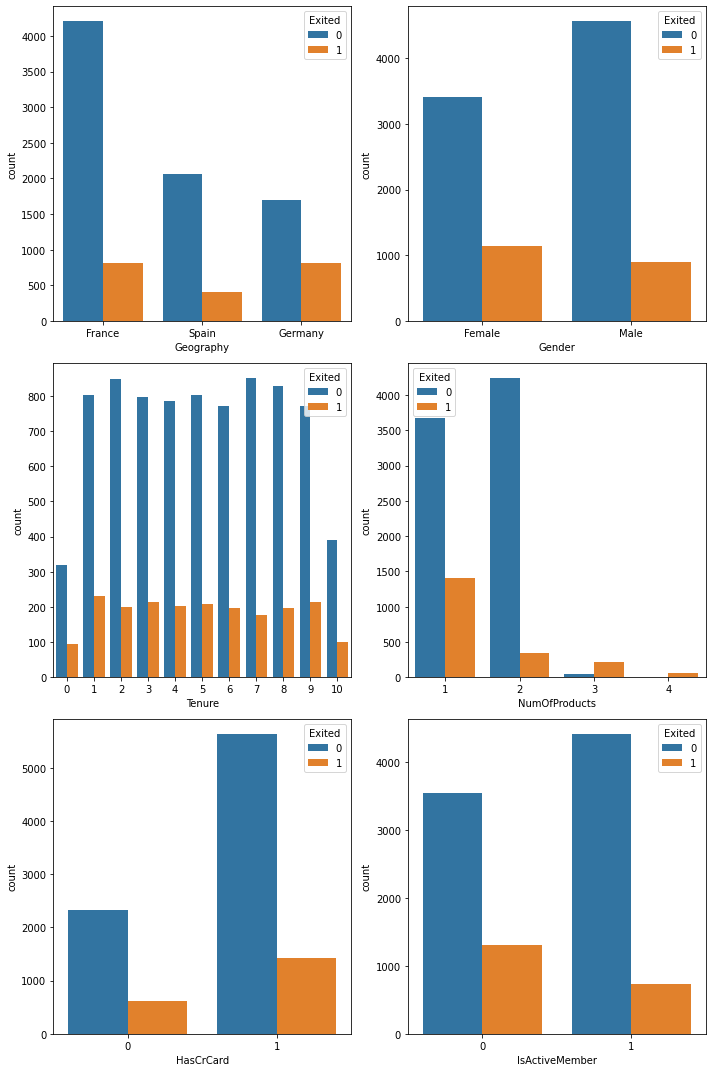

In [13]:
fig, ax = plt.subplots(3, 2, figsize = (10, 15))

sns.countplot(x = 'Geography', hue = 'Exited', data = df, ax = ax[0][0])
sns.countplot(x = 'Gender', hue = 'Exited', data = df, ax = ax[0][1])
sns.countplot(x = 'Tenure', hue = 'Exited', data = df, ax = ax[1][0])
sns.countplot(x = 'NumOfProducts', hue = 'Exited', data = df, ax = ax[1][1])
sns.countplot(x = 'HasCrCard', hue = 'Exited', data = df, ax = ax[2][0])
sns.countplot(x = 'IsActiveMember', hue = 'Exited', data = df, ax = ax[2][1])

plt.tight_layout()
plt.show()

#2. Aprofundando a análise exploratória

##2.1 IDADE

Observando a frequencia por idade

In [ ]:
hist_age = sns.histplot(saida_pessoal['Age'], kde= False, bins = 25 )
hist_age.figure.set_size_inches(15, 5)
hist_age.set_title('Distribuição de Frequências por idade', fontsize=20)
hist_age.set_xlabel('Idade', fontsize=16)
hist_age
plt.show()

Idade entre 40 e 60

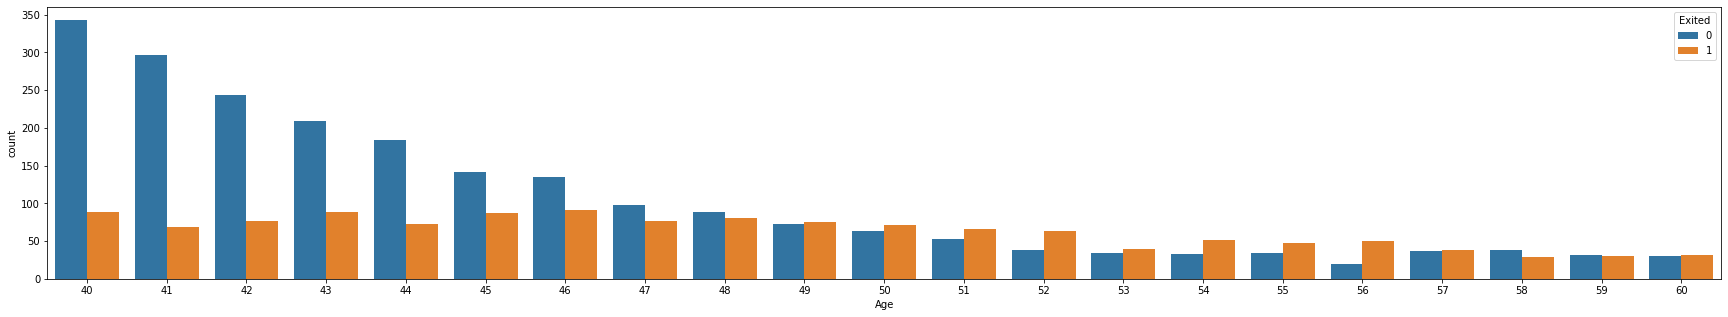

In [31]:
#40-60
saida4060 = df.query('40 <= Age <= 60')
saida4060.value_counts()
graf4060 = sns.countplot(x='Age', hue='Exited', data = saida4060)
graf4060.figure.set_size_inches(30,5)
plt.show()

Idade entre 18 e 39

In [ ]:
saida1839 = df.query('18 <= Age <= 39')
saida1839.value_counts()
graf1839 = sns.countplot(x='Age', hue='Exited', data = saida1839)
graf1839.figure.set_size_inches(30,5)
plt.show()

Idade maior que 60

In [ ]:
saida6092 = df.query('18 <= Age <= 39')
saida6092.value_counts()
graf6092 = sns.countplot(x='Age', hue='Exited', data = saida6092)
graf6092.figure.set_size_inches(30,5)
plt.show()

##2.2 CREDIT SCORE

Definição faixa de score

In [ ]:
def faixa_score (score):
  if score <= 475:
    return '0-475'
  if score <= 600:
    return '475-600'
  if score <= 725:
    return '600-725'
  if score <= 850:
    return '725-850'

df['score_quali'] = [faixa_score(score) for score in df.CreditScore.to_list()]
df['score_quali'].value_counts()

In [ ]:
saida_pelo_score = df.query("Exited == 1")
hist_age = sns.histplot(saida_pelo_score['score_quali'], kde= False, bins = 25 )
hist_age.figure.set_size_inches(15, 5)
hist_age.set_title('Distribuição de Frequências por score das pessoas que saíram', fontsize=20)
hist_age.set_xlabel('Score', fontsize=16)
hist_age
plt.show()

Proporção faixa de score

In [ ]:
grafscore = sns.countplot(x = 'score_quali', hue = 'Exited', data = df)
grafscore.figure.set_size_inches(30,5)
grafscore.set_ylabel('')
grafscore.set_xlabel('Score')
plt.show()

##2.3 SALÁRIO

In [48]:
saida_pessoal = df.query('Exited == 1')

Criando uma faixa para salario

In [ ]:
def faixa_salario(salario):
  if salario <= 50000:
    return 'Abaixo de 50k'
  if 100000 >= salario >= 50000:
    return '50k-100k'
  if 150000 >= salario >= 100000:
    return '100k-150k'
  if 200000 >= salario >= 150000:
    return '150k-200k'

#to_list é uma função que transforma coluna em lista para eu poder iterar
df['faixa_salario'] = [faixa_salario(salario) for salario in df.EstimatedSalary.to_list()]
saida_pessoal['faixa_salario'].value_counts()

Distribuição dos salários totais


In [ ]:
hist_sal = sns.histplot(df['EstimatedSalary'], kde= False, bins = 25 )
hist_sal.figure.set_size_inches(15, 5)
hist_sal.set_title('Distribuição de Frequências por salário', fontsize=20)
hist_sal.set_xlabel('Salário', fontsize=16)
hist_sal
plt.show()

Distribuição das faixas de salário

In [ ]:
hist_sal = sns.histplot(df['faixa_salario'], kde= False, bins = 25 )
hist_sal.figure.set_size_inches(15, 5)
hist_sal.set_title('Distribuição de salário das pessoas que saíram', fontsize=20)
hist_sal.set_xlabel('Salário', fontsize=16)
hist_sal
plt.show()

##BALANCE

TOTAL DE CLIENTES COM BALANCE = 0

In [ ]:
balance0 = df.query('Balance == 0')
sns.countplot('Balance', hue = 'Exited', data = balance0)
plt.show()




ATIVOS QUE SAÍRAM COM BALANCE = 0 E POSSUEM CARTÃO DE CRÉDITO

In [ ]:
ativos = df.query('Balance == 0 & Exited == 1 & IsActiveMember == 1')
graf_als = sns.countplot(x='HasCrCard', data = ativos, hue = 'HasCrCard')
graf_als.figure.set_size_inches(8,5)
graf_als.set(title="Ativos")

plt.show()

INATIVOS QUE SAÍRAM COM BALANCE = 0 E POSSUEM CARTÃO DE CRÉDITO

In [ ]:
inativos = df.query('Balance == 0 & Exited == 1 & IsActiveMember == 0')
graf_als = sns.countplot(x='HasCrCard', data = inativos, hue = 'HasCrCard')
graf_als.figure.set_size_inches(8,5)
graf_als.set(title="Ativos")

plt.show()

##PAÍS

PESSOAS QUE SAÍRAM POR PAÍS

In [ ]:
values = saida_pessoal.Geography.value_counts()
labels = ['Germany','France','Spain']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90)

plt.setp(texts, color = 'black')
plt.setp(autotexts, size = 8, color = 'black')
autotexts[1].set_color('black')
plt.show()

GRÁFICO DE BARRAS PARA ENTENDER A PROPORÇÃO DE QUEM DEU CHURN POR PAÍS

In [ ]:
df
sairambarras = sns.countplot(x='Geography', data = df, hue = 'Exited')

BOXPLOT DE IDADE POR PAÍS

In [ ]:
saidas_pais = sns.boxplot(x = saida_pessoal["Age"], y = saida_pessoal["Geography"])
saidas_pais.set(title="Concentração de saída por idade nos países")
plt.ylabel("")
plt.xlabel("Idade")
plt.xlim(18,60)

plt.show()

OBSERVAR OS SALÁRIOS, PARA ISSO FOI DEFINIDO OS SALÁRIOS PELA IDADE. AQUI PUDE ENCONTRAR MAIS VARIAÇÕES

In [68]:
#observar outras variaveis pela idade.
idade_franca = df.query('Geography == "France" & 37 < Age < 53 & Exited == 1')
idade_espanha = df.query('Geography == "Spain" & 35 < Age < 52 & Exited == 1')
idade_alemanha = df.query('Geography == "Germany" & 38 < Age < 52 & Exited == 1')

SAÍDA POR SALÁRIO NA ESPANHA

In [ ]:
graf_es = sns.countplot(data=idade_espanha, x="faixa_salario")
graf_es.set_xlabel('')
graf_es.set_ylabel('')
graf_es.set(title = "Saída por salário na espanha")

SAÍDA POR SALÁRIO NA ALEMANHA

In [ ]:
graf_al = sns.countplot(data=idade_alemanha, x="faixa_salario")
graf_al.set_xlabel('')
graf_al.set_ylabel('')
graf_al.set(title = "Saída por salário na Alemanha")

SAÍDA POR SALÁRIO NA FRANÇA

In [ ]:
graf_fr = sns.countplot(data=idade_franca, x="faixa_salario")
graf_fr.set_xlabel('')
graf_fr.set_ylabel('')
graf_fr.set(title = "Saída por salário na França")
plt.show()

SAÍDA POR ATIVIDADE POR PAÍS

In [ ]:
saiu_pais = df.query('Exited == 1')

grafico = sns.countplot(x = 'Geography', hue = 'IsActiveMember', data = saiu_pais)
grafico.set(title = "Saída por atividade")

SAÍDA POR ATIVIDADE E SEM SALDO EM CONTA(NINGUÉM NA ALEMANHA)

In [ ]:
saiu_0 = df.query('Exited == 1 & Balance == 0')

grafico = sns.countplot(x = 'Geography', hue = 'IsActiveMember', data = saiu_0)
grafico.set(title = "Saída por atividade")

SAÍDA PELA FAIXA DE SCORE EM CADA PAÍS

In [76]:
saida_es = df.query('Exited == 1 & Geography == "Spain"')
saida_al = df.query('Geography == "Germany" & Exited == 1')
saida_fr = df.query('Geography == "France" & Exited == 1')

SAÍDAS NA ESPANHA

In [ ]:
graf_esp = sns.countplot(data=saida_es, x="score_quali")
graf_esp.set_xlabel('')
graf_esp.set_ylabel('')
graf_esp.set(title = "Saída por score na espanha")

plt.show()

SAÍDAS NA FRANÇA

In [ ]:
graf_fra = sns.countplot(data=saida_fr, x="score_quali")
graf_fra.set_xlabel('')
graf_fra.set_ylabel('')
graf_fra.set(title = "Saída por score na França")

SAÍDAS NA ALEMANHA

In [ ]:
graf_ale = sns.countplot(data=saida_al, x="score_quali")
graf_ale.set_xlabel('')
graf_ale.set_ylabel('')
graf_ale.set(title = "Saída por score na Alemanha")